![Alt Text](Thomas_Fire_burn_scar_on_Dec_7.jpg)


### Impacts of the Fire 
The Thomas Fire, which ignited on December 4, 2017, and burned until January 12, 2018, stands as one of the most devastating wildfires in California's history. Spanning over 281,893 acres (approximately 1,141 square kilometers), it destroyed 1,063 structures and caused damages exceeding $2.2 billion. The fire's impact on air quality was profound, with particulate matter levels soaring and the Air Quality Index (AQI) reaching hazardous levels in affected areas .

In this blog post, we delve into the use of false color imagery and AQI analysis to uncover the environmental and health impacts of the Thomas Fire. By leveraging satellite data and geospatial analysis, we aim to provide a comprehensive understanding of how this catastrophic event altered the landscape and air quality, offering insights into the broader implications of wildfires on public health and environmental sustainability

### About the Data
Fire Perimeter: Shapefile of the Thomas Fire perimeter, obtained from the California Department of Forestry and Fire Protection (CAL FIRE) 

Satellite Imagery: Landsat 8 imagery accessed via the server at UCSB

AQI Data[^3]: This dataset is a dataframe with AQI values of cities all across the US. Retrieved from The U.S. Environmental Protection Agency [^3]

### False Color: A Quick Overview
False color imagery is a powerful tool used in remote sensing to enhance specific features of the landscape that might not be visible in natural color images. By assigning visible colors (like red, green, and blue) to spectral bands that the human eye cannot see (such as near-infrared), false color images highlight various aspects of the environment. For instance, healthy vegetation reflects more infrared light and appears bright red in false color images, while burned areas, like those from the Thomas Fire, show up in darker hues, making them easier to distinguish.

### About 

#### Purpose:
Subsetting a geodatabase retrieved from CalFire to include just the Thomas Fire boundary from 2017

#### Highlights: 
Use geopandas to read in gdb file. Filter the dataset for Thomas Fire 2017 only. Export to data folder.

#### About the data: 
A geodatabase containing all fire boundaries for the state of Califronia, obtained from the California Department of Forestry and Fire Protection (CAL FIRE) https://www.fire.ca.gov and a Shapefile of the Thomas Fire 2017 boundary.

#### Import Libraries 

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import rioxarray as rioxr
import matplotlib.ticker as ticker
from matplotlib.patches import Patch

#### Import File Geodatabase 

In [3]:
# Read in gdb file with geopandas. Save as variable fire_bounds
fire_bound = gpd.read_file("data/fire23-1gdb/fire23_1.gdb")

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


#### Quick Data Exploration

In [6]:
# Check the dataset
print(fire_bound.head())

# Check the CRS 
print(fire_bound.crs)

# Check the number of rows and columns 
print(fire_bound.shape)

    YEAR_ STATE AGENCY UNIT_ID  FIRE_NAME   INC_NUM  \
0  2023.0    CA    CDF     SKU  WHITWORTH  00004808   
1  2023.0    CA    LRA     BTU     KAISER  00010225   
2  2023.0    CA    CDF     AEU    JACKSON  00017640   
3  2023.0    CA    CDF     AEU     CARBON  00018821   
4  2023.0    CA    CDF     AEU    LIBERTY  00018876   

                                  IRWINID                 ALARM_DATE  \
0  {7985848C-0AC2-4BA4-8F0E-29F778652E61}  2023-06-17T00:00:00+00:00   
1  {43EBCC88-B3AC-48EB-8EF5-417FE0939CCF}  2023-06-02T00:00:00+00:00   
2  {B64E1355-BF1D-441A-95D0-BC1FBB93483B}  2023-07-01T00:00:00+00:00   
3  {CB41DB0A-E4B1-489D-A4EA-738F2CD6DB3B}  2023-07-11T00:00:00+00:00   
4  {F83F70A4-07A7-40B8-BD51-10CCC1C30D63}  2023-07-11T00:00:00+00:00   

                   CONT_DATE  C_METHOD  CAUSE  OBJECTIVE COMPLEX_NAME  \
0  2023-06-17T00:00:00+00:00       1.0    5.0        1.0         None   
1  2023-06-02T00:00:00+00:00       1.0    5.0        1.0         None   
2  2023-07-02T00:

In [ ]:
# Check if the CRS is projected or geographic
if fire_bound.crs.is_projected:
    print("The CRS is projected.")
elif fire_bound.crs.is_geographic:
    print("The CRS is geographic.")

    YEAR_ STATE AGENCY UNIT_ID  FIRE_NAME   INC_NUM  \
0  2023.0    CA    CDF     SKU  WHITWORTH  00004808   
1  2023.0    CA    LRA     BTU     KAISER  00010225   
2  2023.0    CA    CDF     AEU    JACKSON  00017640   
3  2023.0    CA    CDF     AEU     CARBON  00018821   
4  2023.0    CA    CDF     AEU    LIBERTY  00018876   

                                  IRWINID                 ALARM_DATE  \
0  {7985848C-0AC2-4BA4-8F0E-29F778652E61}  2023-06-17T00:00:00+00:00   
1  {43EBCC88-B3AC-48EB-8EF5-417FE0939CCF}  2023-06-02T00:00:00+00:00   
2  {B64E1355-BF1D-441A-95D0-BC1FBB93483B}  2023-07-01T00:00:00+00:00   
3  {CB41DB0A-E4B1-489D-A4EA-738F2CD6DB3B}  2023-07-11T00:00:00+00:00   
4  {F83F70A4-07A7-40B8-BD51-10CCC1C30D63}  2023-07-11T00:00:00+00:00   

                   CONT_DATE  C_METHOD  CAUSE  OBJECTIVE COMPLEX_NAME  \
0  2023-06-17T00:00:00+00:00       1.0    5.0        1.0         None   
1  2023-06-02T00:00:00+00:00       1.0    5.0        1.0         None   
2  2023-07-02T00:

#### Fire Data Exploration
With some quick data explloration, you can see that the dataset from California Department of Forestry and Fire Protection has over 22,000 fires between the years 1878 and 2023. You can also see what types column names and values we are dealing with. For example, are there capital letters? spaces? unusual characters in columns? This will help further filtering the data to the Thomas Fire in 2017

> 💡 **Tip:**
> **Look at the year column. Do you notice anything that might make filtering the data in that column tricky?**


#### Filter Data for Thomas Fire in 2017

In [5]:
# Filter for 'THOMAS' and the year 2017, save as vairable thomas_fire
thomas_fire = fire_bound[(fire_bound['FIRE_NAME'] == 'THOMAS') & (fire_bound['YEAR_'] == 2017.0)]

# Check the dataset
thomas_fire.head()

,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,IRWINID,ALARM_DATE,CONT_DATE,C_METHOD,CAUSE,OBJECTIVE,COMPLEX_NAME,COMPLEX_ID,COMMENTS,FIRE_NUM,Shape_Length,Shape_Area,geometry
2654,2017.0,CA,USF,VNC,THOMAS,00003583,,2017-12-04T00:00:00+00:00,2018-01-12T00:00:00+00:00,7.0,9.0,1.0,None,None,CONT_DATE based on Inciweb,None,445282.444798,1.140367e+09,"MULTIPOLYGON (((34867.386 -396856.457, 34819.3..."


<Axes: >

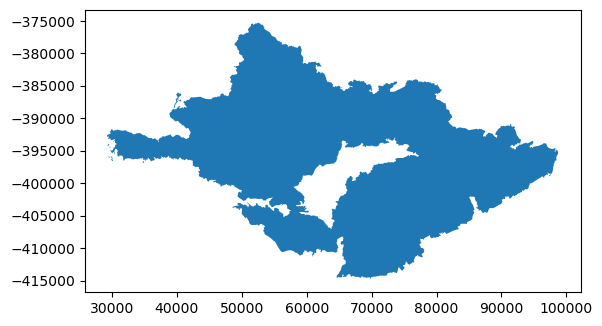

In [6]:
# Check the fire perimeter by plotting 
thomas_fire.plot()

#### Export the Thomas Fire boundary 

#### Filter and Plotting 
After I filtered for just the 2017 Thomas Fire, it is handy to plot it to see exactly what you are working with. In this case, this looks to be the Thomas Fire perimeter we are looking for! Next, I'll export it as a shapefile to use later. 

> 📝 **A Quick Note:**
> I chose to use a shapefile for several reasons, the first being because I am more familiar with that file type. Second, the format is straightforward and easy to use when working with vector data.

In [7]:
# Specify the output path where you want to save the new shapefile
output_path = "data/Thomas_Fire.shp"

# Save the filtered GeoDataFrame to the specified path
thomas_fire.to_file(output_path)

/tmp/ipykernel_3610778/2262642917.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  thomas_fire.to_file(output_path)


#### Bring in Landsat Image 
Next, upload the satellite image of the Santa Barbara area. This image is form the Landsat program and specifically Landsat 8 

In [8]:
# Create file path to landsat data, save as variable root
root = os.path.join('/','courses', 'EDS220', 'data', 'hwk4_landsat_data')

# Use os.path.join to select variable root and file landsat8-2018-01-26-sb-simplified.nc file, save it as variable fp
fp = os.path.join(root,'landsat8-2018-01-26-sb-simplified.nc')

# Use rioxr to open file and save it as color bands 
color_bands = rioxr.open_rasterio(fp)

# Check the variable
color_bands

<xarray.Dataset> Size: 25MB
Dimensions:      (band: 1, x: 870, y: 731)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (band, y, x) float64 5MB ...
    green        (band, y, x) float64 5MB ...
    blue         (band, y, x) float64 5MB ...
    nir08        (band, y, x) float64 5MB ...
    swir22       (band, y, x) float64 5MB ...

Take at the output for the variable color_bands. You can see the data contains variables named "red", "green", "blue", "nir08", "swir22" and has the dimensions (band: 1x: 870y: 731). These variable names are what we use to present a false color image. 

#### Drop the Band Dimensions

In [11]:
# Original dimensions and coordinates
print(color_bands.dims, color_bands.coords,'\n')

# Remove length 1 dimension (band)
color_bands = color_bands.squeeze()
print(color_bands.dims, color_bands.coords,'\n')

# Remove coordinates associated to band
color_bands = color_bands.drop_vars('band')
print(color_bands.dims, color_bands.coords)

FrozenMappingWarningOnValuesAccess({'band': 1, 'x': 870, 'y': 731}) Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0 

FrozenMappingWarningOnValuesAccess({'x': 870, 'y': 731}) Coordinates:
    band         int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0 

FrozenMappingWarningOnValuesAccess({'x': 870, 'y': 731}) Coordinates:
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0


> 💡 **Tip:**
> **Dropping the band will allow us to work with one less dimesion, making it easier to plot**

#### Select Red, Green, and Blue variables

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


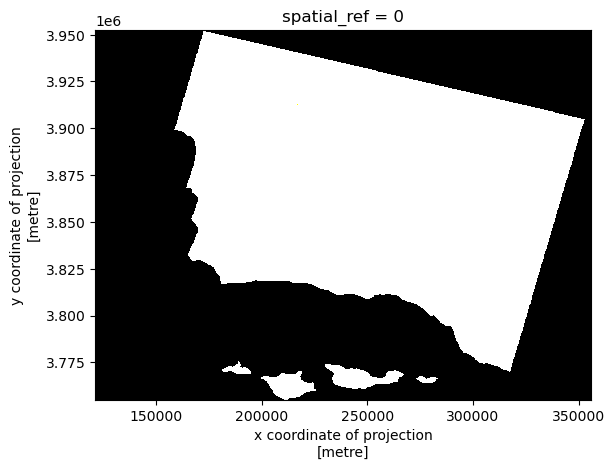

In [12]:
# Convert the selected variables to a NumPy array and plot the RGB image
color_bands[['red', 'green', 'blue']].to_array().plot.imshow()

A quick look and we can see that this does not look like a satellite image. This is because our values are being skewed because of some extreme numbers. we will want to change the parameter to robust = True. It scales the image based on these percentiles, effectively ignoring the extreme low (below the 2nd percentile) and high (above the 98th percentile) values.

> 🤔 **Thinking:**
> What are some object in the earths atmosphere that could cause extreme values? HINT: Think of what blocks the sun for us!


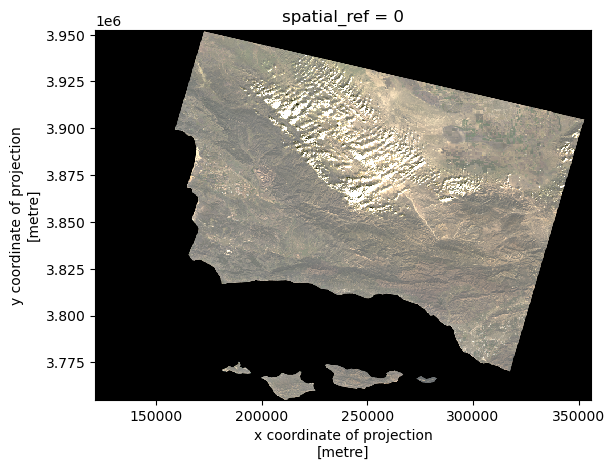

In [13]:
# Convert the selected variables to a NumPy array and plot the RGB image, adjust scale with robust = True 
color_bands[['red', 'green', 'blue']].to_array().plot.imshow(robust = True)

#### False Color Image

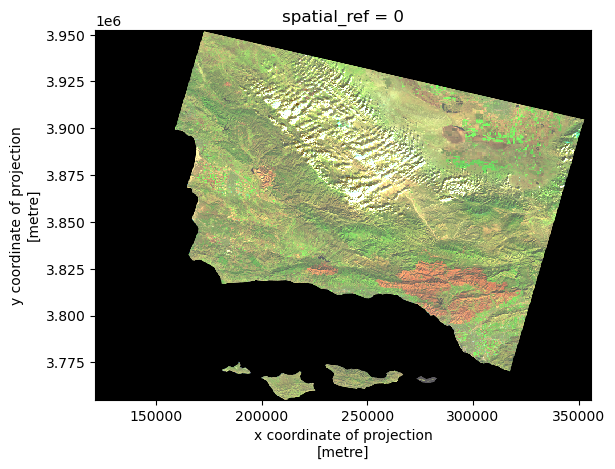

In [14]:
# Create false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables 
color_bands[['swir22', 'nir08', 'blue']].to_array().plot.imshow(robust = True)

By placing the Short-Wave Infrared (SWIR) in the red band, Near-Infrared (NIR) in the green band, and keeping blue in the blue band, we can create a flase color image of the Santa Barbara region

#### Map with Thomas Fire SHapefile We Made

##### Import Thomas Fire Perimeter and Check CRS's 

In [16]:
# Import Thomas Fire Perimeter
fire_bound = gpd.read_file(os.path.join('data','Thomas_Fire.shp'))

# Check CRS's 
print(fire_bound.crs == color_bands.rio.crs)

False


Since the CRS's do not match, we need to transform. Since this is important for mapping, we will write an assert test to make sure 

In [17]:
# Ensure CRS matches (transform CRS if necessary)
if fire_bound.crs != color_bands.rio.crs:
    fire_bound = fire_bound.to_crs(color_bands.rio.crs)

# Check if the CRSs match
assert fire_bound.crs == color_bands.rio.crs, "CRS of fire_bound does not match CRS of color_bands"

print("CRS match successfully!")


CRS match successfully!


> 💡 **Tip:**
> **Assert tests are a quick way to verify your output is what you want**

#### Plot 

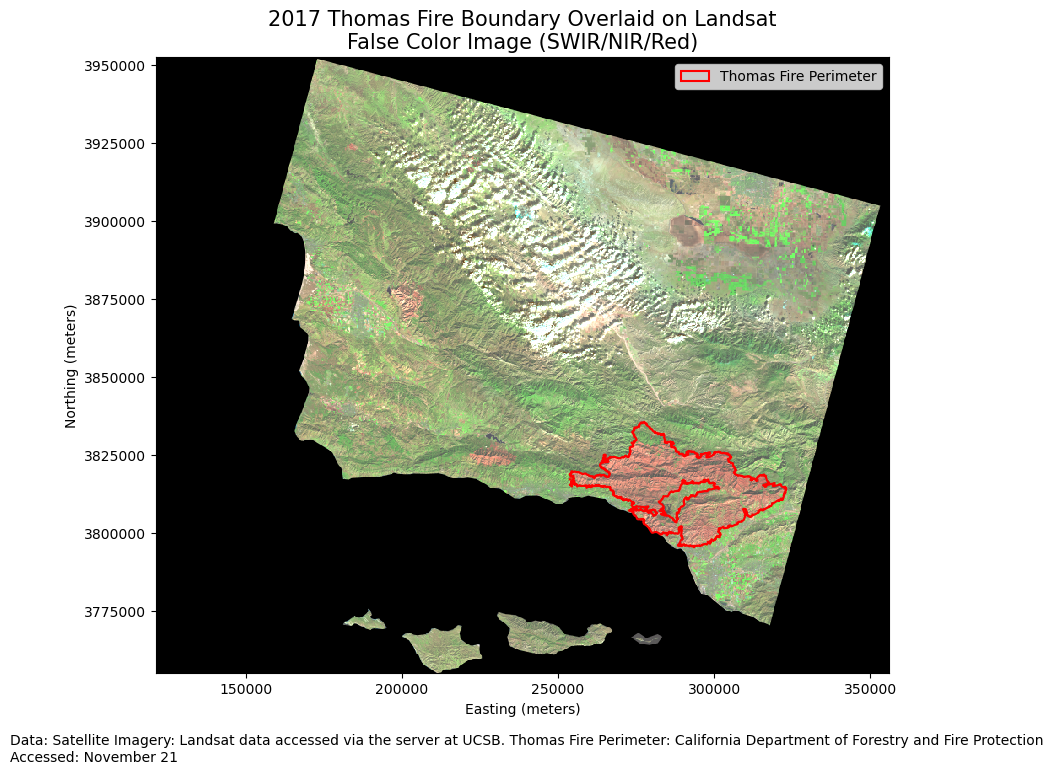

In [22]:
# Plot the RGB image with robust scaling
fig, ax = plt.subplots(figsize=(10, 8))
color_bands[['swir22', 'nir08', 'red']].to_array().plot.imshow(ax=ax, robust=True)

# Set the y-axis to display integers only 
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

# Overlay the fire perimeter
fire_bound.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=1.5, label='Thomas Fire Perimeter')

# Customize the plot
ax.set_title('2017 Thomas Fire Boundary Overlaid on Landsat\nFalse Color Image (SWIR/NIR/Red)', fontsize=15)
ax.set_xlabel('Easting (meters)')
ax.set_ylabel('Northing (meters)')

# Add a custom legend 
legend_handles = [Patch(facecolor='none', edgecolor='red', linewidth=1.5, label='Thomas Fire Perimeter')] 
ax.legend(handles=legend_handles, loc='upper right')

# PLot figure text 
plt.figtext(0, 0,
           "Data: Satellite Imagery: Landsat data accessed via the server at UCSB. Thomas Fire Perimeter: California Department of Forestry and Fire Protection\nAccessed: November 21")

plt.show()

#### Brief Map Summary

This map illustrates the Thomas Fire perimeter overlaid on a false color image created using shortwave infrared (SWIR), near-infrared (NIR), and red bands from the Landsat satellite imagery. SWIR (Shortwave Infrared) Band: Mapped to the red channel, SWIR is sensitive to moisture content and can distinguish between dry and wet areas, as well as highlight burn scars from wildfires. NIR (Near-Infrared) Band: Mapped to the green channel, NIR is useful for vegetation analysis because healthy vegetation reflects more near-infrared light. Red Band: Mapped to the blue channel, the red band provides detail and clarity to the overall image.

#### The Impact on AQI

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read in data, use compression = 'zip' for the ZIP file
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip', compression = 'zip')
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip', compression = 'zip')

# Do some data exploration
aqi_17.columns
aqi_18.columns
aqi_17.dtypes
aqi_18.dtypes
aqi_17.shape
aqi_18.shape
aqi_17.isnull().sum()
aqi_18.isnull().sum()

# Use .concat to glue the data frames togehter, ave it as variable aqi
aqi = pd.concat([aqi_17, aqi_18])

# Check the output
aqi


# Simplify column names
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_')
                )

# Check the output
aqi.columns

# Filter by county is equal to Santa Barbara, save as variable aqi_sb, use .drop to remove the columns listed above from the aqi_sb data frame
aqi_sb = aqi[aqi['county_name'] == 'Santa Barbara'].drop(['state_name', 
                                                          'county_name', 
                                                          'state_code', 
                                                          'county_code'], axis = 1)

# Use pd.to_datetime to change the 'date' column in the aqi_sb data frame 
aqi_sb.date = pd.to_datetime(aqi_sb['date'])


# Use set_index to make the 'date' column the index 
aqi_sb = aqi_sb.set_index('date')


# Calculate AQI rolling average over 5 days
rolling_average = aqi_sb['aqi'].rolling('5D').mean()

# Call previous variable rolling_average and save it to a new column named five_day_average in the aqi_sb data frame
aqi_sb['five_day_average'] = rolling_average

# Check for the new column in the head 
aqi_sb.head()

# Create the plot
plt.figure(figsize=(14, 7))
plt.plot(aqi_sb.index, aqi_sb['aqi'], label='Daily AQI', color='blue', alpha=0.5)
plt.plot(aqi_sb.index, rolling_average, label='5-Day Rolling Average', color='red', linewidth=2)

# Highlight the period of the Thomas Fire in December 2017
plt.axvspan(pd.Timestamp('2017-12-04'), pd.Timestamp('2017-12-23'), color='yellow', alpha=0.5, label='Thomas Fire Period')

# Add titles and labels
plt.title('Daily AQI and 5-Day Rolling Average for Santa Barbara County')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read in data, use compression = 'zip' for the ZIP file
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip', compression = 'zip')
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip', compression = 'zip')

# Do some data exploration
aqi_17.columns
aqi_18.columns
aqi_17.dtypes
aqi_18.dtypes
aqi_17.shape
aqi_18.shape
aqi_17.isnull().sum()
aqi_18.isnull().sum()

# Use .concat to glue the data frames togehter, ave it as variable aqi
aqi = pd.concat([aqi_17, aqi_18])

# Check the output
aqi


# Simplify column names
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_')
                )

# Check the output
aqi.columns

# Filter by county is equal to Santa Barbara, save as variable aqi_sb, use .drop to remove the columns listed above from the aqi_sb data frame
aqi_sb = aqi[aqi['county_name'] == 'Santa Barbara'].drop(['state_name', 
                                                          'county_name', 
                                                          'state_code', 
                                                          'county_code'], axis = 1)

# Use pd.to_datetime to change the 'date' column in the aqi_sb data frame 
aqi_sb.date = pd.to_datetime(aqi_sb['date'])


# Use set_index to make the 'date' column the index 
aqi_sb = aqi_sb.set_index('date')


# Calculate AQI rolling average over 5 days
rolling_average = aqi_sb['aqi'].rolling('5D').mean()

# Call previous variable rolling_average and save it to a new column named five_day_average in the aqi_sb data frame
aqi_sb['five_day_average'] = rolling_average

# Check for the new column in the head 
aqi_sb.head()

# Create the plot
plt.figure(figsize=(14, 7))
plt.plot(aqi_sb.index, aqi_sb['aqi'], label='Daily AQI', color='blue', alpha=0.5)
plt.plot(aqi_sb.index, rolling_average, label='5-Day Rolling Average', color='red', linewidth=2)

# Highlight the period of the Thomas Fire in December 2017
plt.axvspan(pd.Timestamp('2017-12-04'), pd.Timestamp('2017-12-23'), color='yellow', alpha=0.5, label='Thomas Fire Period')

# Add titles and labels
plt.title('Daily AQI and 5-Day Rolling Average for Santa Barbara County')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In this plot, the Thomas Fire dates are highlighted by the yellow rectangle. It is clear that AQI went through the roof. This is to be expected considering the nature of forest fires. 

![Alt Text](Screenshot.png)


[^1]: https://en.wikipedia.org/wiki/Thomas_Fire?form=MG0AV3

[^2]: https://www.fire.ca.gov/incidents/2017/?form=MG0AV3

[^3]: https://www.epa.gov/